In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from utils.data_storage import DataContianer
from utils.data_visualization_utils import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bruce/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
drone1 = "drone1"
drone2 = "drone2"
drone3 = "drone3"
drone4 = "drone4"
title_rf='Learning Curve (Random Forest)'
title_gb='Learning Curve (Gradient Boosting)'

In [7]:
cv = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)

# Load and Combine Data

In [8]:
d1 = DataContianer('drone1', 'gyro', 4, reduce_noise=False, k=0, is_directional=False)
d2 = DataContianer('drone2', 'gyro', 4, reduce_noise=False, k=0, is_directional=False)
d4 = DataContianer('drone4', 'gyro', 4, reduce_noise=False, k=0, is_directional=False)

X_train = d1.X_train_transformed
X_train = X_train.append(d2.X_train_transformed, ignore_index=True)
X_train = X_train.append(d4.X_train_transformed, ignore_index=True)

y_train = d1.y_train_transformed
y_train = np.append(y_train, d2.y_train_transformed)
y_train = np.append(y_train, d4.y_train_transformed)

X_test = d1.X_test_transformed
X_test = X_test.append(d2.X_test_transformed, ignore_index=True)
X_test = X_test.append(d4.X_test_transformed, ignore_index=True)

y_test = d1.y_test_transformed
y_test = np.append(y_test, d2.y_test_transformed)
y_test = np.append(y_test, d4.y_test_transformed)

# Random Forest

In [9]:
rf = RandomForestClassifier(random_state=13)

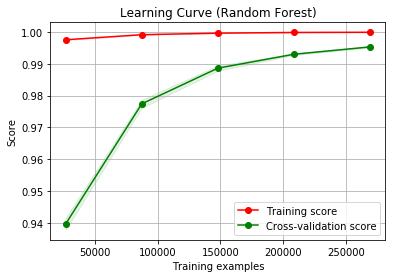

In [10]:
plot_learning_curve(rf, title_rf, X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

# Gradient Boosting

In [11]:
gb = GradientBoostingClassifier(random_state=13)

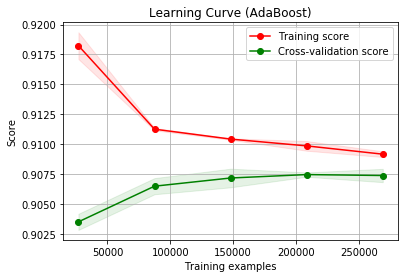

In [12]:
plot_learning_curve(gb, title_gb, X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

# Drone 1

In [41]:
import pandas as pd

In [48]:
drone1_gyro_data = DataContianer(drone1, 'gyro', 4)

In [49]:
pd.DataFrame(drone1_gyro_data.X_train_transformed[drone1_gyro_data.y_train_transformed==3].mean()).T

,mu_x_gyro,mu_y_gyro,mu_z_gyro,std_x_gyro,std_y_gyro,std_z_gyro,avg_resultant_acc_gyro,bin_0_gyro,bin_1_gyro,bin_2_gyro,...,bin_23_gyro,bin_24_gyro,bin_25_gyro,bin_26_gyro,bin_27_gyro,bin_28_gyro,bin_29_gyro,mean_abs_difference_x_gyro,mean_abs_difference_y_gyro,mean_abs_difference_z_gyro
0,-0.013751,0.006414,0.084951,50.785694,42.236212,14.389573,60.605176,4.65349,5.844754,9.058861,...,13.164978,14.42333,13.37875,10.927728,8.722685,6.721514,6.42925,40.375568,33.424658,11.534123


In [54]:
pd.DataFrame(drone1_gyro_data.X_train_transformed[drone1_gyro_data.y_train_transformed==2].mean()).T

,mu_x_gyro,mu_y_gyro,mu_z_gyro,std_x_gyro,std_y_gyro,std_z_gyro,avg_resultant_acc_gyro,bin_0_gyro,bin_1_gyro,bin_2_gyro,...,bin_23_gyro,bin_24_gyro,bin_25_gyro,bin_26_gyro,bin_27_gyro,bin_28_gyro,bin_29_gyro,mean_abs_difference_x_gyro,mean_abs_difference_y_gyro,mean_abs_difference_z_gyro
0,0.047715,-0.067704,0.126859,31.154679,26.144627,14.341835,39.008868,4.425905,5.099227,8.177686,...,12.282867,12.469081,12.323835,10.729106,8.808234,6.948229,8.019899,24.404441,20.78382,11.591987


In [56]:
drone2_gyro_data = DataContianer(drone4, 'gyro', 4)

In [57]:
pd.DataFrame(drone2_gyro_data.X_train_transformed[drone2_gyro_data.y_train_transformed==3].mean()).T

,mu_x_gyro,mu_y_gyro,mu_z_gyro,std_x_gyro,std_y_gyro,std_z_gyro,avg_resultant_acc_gyro,bin_0_gyro,bin_1_gyro,bin_2_gyro,...,bin_23_gyro,bin_24_gyro,bin_25_gyro,bin_26_gyro,bin_27_gyro,bin_28_gyro,bin_29_gyro,mean_abs_difference_x_gyro,mean_abs_difference_y_gyro,mean_abs_difference_z_gyro
0,0.053319,0.00105,-0.03211,36.093601,34.920041,11.726316,46.459453,4.367111,5.691984,9.429317,...,12.167954,13.897529,13.705762,12.478479,10.07662,7.710946,6.969399,28.831679,27.826582,9.417632


In [58]:
pd.DataFrame(drone2_gyro_data.X_train_transformed[drone2_gyro_data.y_train_transformed==2].mean()).T

,mu_x_gyro,mu_y_gyro,mu_z_gyro,std_x_gyro,std_y_gyro,std_z_gyro,avg_resultant_acc_gyro,bin_0_gyro,bin_1_gyro,bin_2_gyro,...,bin_23_gyro,bin_24_gyro,bin_25_gyro,bin_26_gyro,bin_27_gyro,bin_28_gyro,bin_29_gyro,mean_abs_difference_x_gyro,mean_abs_difference_y_gyro,mean_abs_difference_z_gyro
0,0.158694,0.047239,-0.048753,28.191177,24.491496,15.758707,37.120659,4.501722,5.550918,8.90094,...,11.221197,12.023879,11.623892,10.970101,9.615431,8.559212,9.106752,22.224661,19.426989,12.899492
